In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
torch.manual_seed(42)

In [59]:
df = pd.read_csv('/content/drive/MyDrive/NN/loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [71]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'debt_to_income_ratio', 'total_assets_value',
       'loan_to_asset_ratio'],
      dtype='object')

In [69]:
df['debt_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df['total_assets_value'] = (df['residential_assets_value'] + df['commercial_assets_value'] +
                            df['luxury_assets_value'] + df['bank_asset_value'])
df['loan_to_asset_ratio'] = df['loan_amount'] / df['total_assets_value']

In [61]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income_ratio,total_assets_value,loan_to_asset_ratio
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,3.114583,50700000,0.589744
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.975610,17000000,0.717647
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,3.263736,57700000,0.514731
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,3.743902,52700000,0.582543
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,2.469388,55000000,0.440000


In [74]:
print(df['education'].value_counts())
print("")
print(df['self_employed'].value_counts())
print("")
print(df['loan_status'].value_counts())

education
1    2144
0    2125
Name: count, dtype: int64

self_employed
1    2150
0    2119
Name: count, dtype: int64

loan_status
1    2656
0    1613
Name: count, dtype: int64


In [72]:

df['education'] = df['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income_ratio,total_assets_value,loan_to_asset_ratio
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,50700000,0.589744
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,17000000,0.717647
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,57700000,0.514731
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,52700000,0.582543
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,55000000,0.440000


In [75]:
# Define the CIBIL rating function
def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"

# Create a new column 'CIBIL_rating' using the cibil_rating function
df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

# Grouping data based on the CIBIL Rating and Loan approval Status
cibil_rating_df = df.groupby(['CIBIL_rating', 'loan_status']).size().reset_index(name='Total')

In [76]:
cibil_rating_df

,CIBIL_rating,loan_status,Total
0,Average,0,2
1,Average,1,681
2,Excellent,0,6
3,Excellent,1,1050
4,Good,0,5
5,Good,1,740
6,Poor,0,1600
7,Poor,1,185


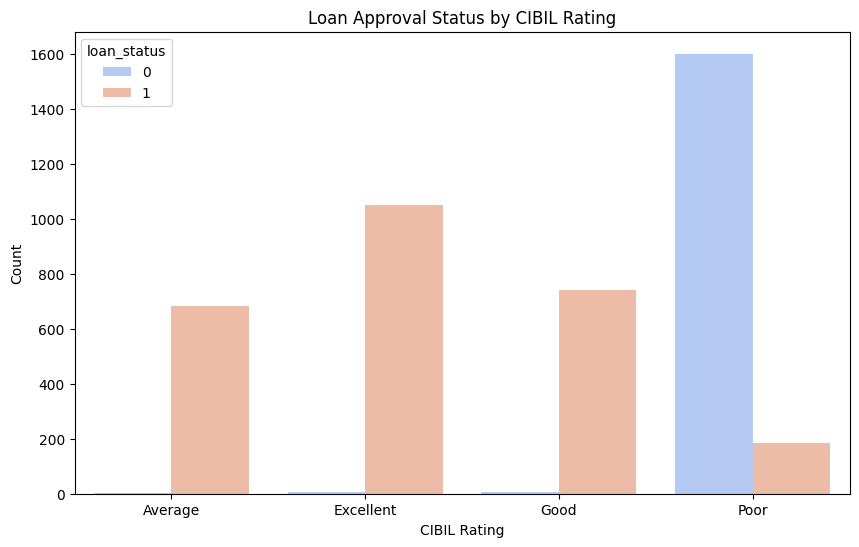

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CIBIL_rating', y='Total', hue='loan_status', data=cibil_rating_df, palette='coolwarm')

# Creating Labels
plt.title("Loan Approval Status by CIBIL Rating")
plt.xlabel("CIBIL Rating")
plt.ylabel("Count")

# Show the plot
plt.show()

In [79]:
df.drop(columns=['CIBIL_rating'], inplace=True)

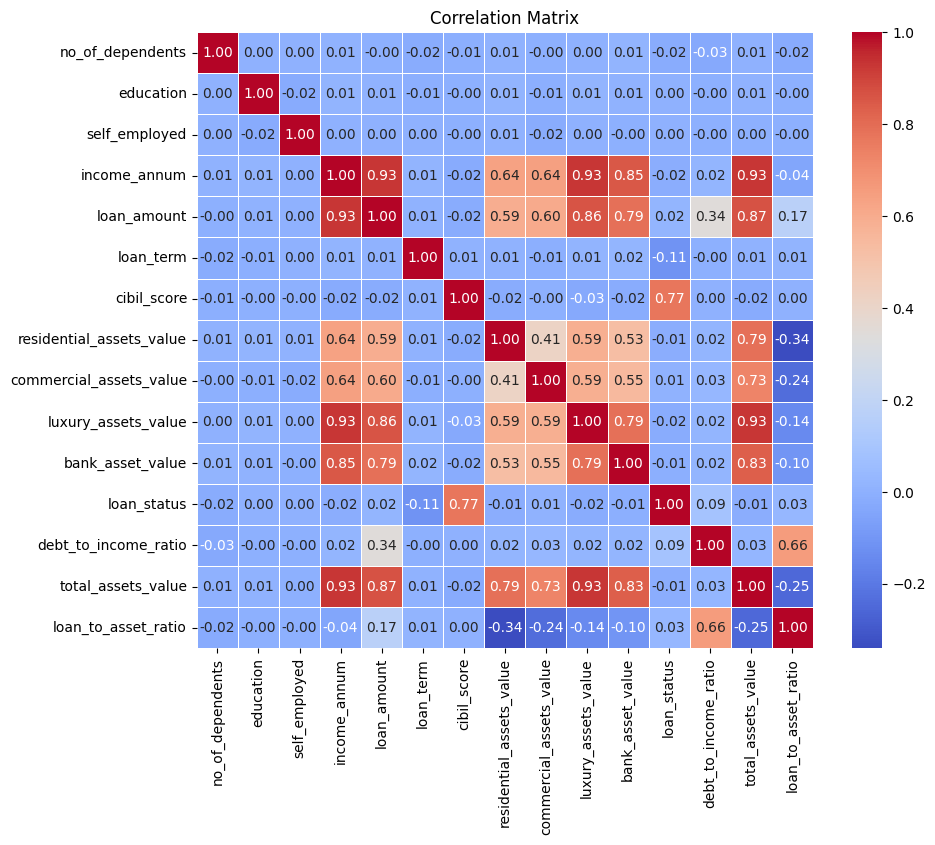

In [82]:
corr_matrix = df.corr()
corr_matrix
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Set the title and labels
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df